In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data = pd.read_csv(r"C:/Users/user/historical_data.csv")
#data.head()

# Data Preparation

In [3]:
#data.info()

In [4]:
#converting time in datetime format
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])


In [5]:
#data.info()

In [6]:
#feature creation
#create the target variable for regression
from datetime import datetime
data['actual_total_delivery_duration'] = data["actual_delivery_time"] - data['created_at']


In [7]:
data['busy_dashers_ratio'] = data['total_busy_dashers'] / data['total_onshift_dashers']

In [8]:
data['estimated_non_prep_duration'] = data['estimated_store_to_consumer_driving_duration'] + data['estimated_order_place_duration']

In [9]:
#check ids and decide whether to encode or not
data['market_id'].nunique()

6

In [10]:
data['store_id'].nunique()

6743

In [11]:
data['order_protocol'].nunique()

7

In [12]:
#data.market_id.unique

In [13]:
#create dummies for order protocol
#order_protocol_dummies = pd.get_dummies(data.order_protocol, dtype=int)
#order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')


In [14]:
#order_protocol_dummies.head()

In [15]:
#create dummies for market_id
#market_id_dummies = pd.get_dummies(data.market_id, dtype=int)
#market_id_dummies = market_id_dummies.add_prefix('market_id_')
#market_id_dummies.head()


In [16]:
#create dictionary with most repeated categories of each store to fill null rows where it is possible
store_id_unique = data['store_id'].unique().tolist()
store_id_and_category = {store_id: data[data.store_id == store_id].store_primary_category.mode()
                        for store_id in store_id_unique}

In [17]:
def fill(store_id):
    """Return primary store category from the dictionary"""
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan
#fill null values
data['nan_free_store_primary_category'] = data.store_id.apply(fill)

In [18]:
#data['nan_free_store_primary_category']

In [19]:
#create dummies for store primary category
store_primary_category_dummies = pd.get_dummies(data.nan_free_store_primary_category, dtype = int)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,estimated_non_prep_duration,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59,0.424242,1307.0,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04,2.000000,1136.0,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41,0.000000,1136.0,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15,1.000000,735.0,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50,1.000000,1096.0,indian


In [21]:
#drop created_at, market_id, store_id,order_protocol, store_primary_category, actual_delivery_time, actual_total_delivery_duration
#train_df = data.drop(columns = ['created_at','market_id','store_id','order_protocol','store_primary_category','actual_delivery_time','nan_free_store_primary_category', 'actual_total_delivery_duration'])
#train_df.head()
train_df = data.drop(columns =['created_at','actual_delivery_time','store_primary_category','nan_free_store_primary_category'])
#train_df.info()

In [22]:
#train_df = pd.concat([train_df, market_id_dummies, store_primary_category_dummies], axis=1)
#train_df.head()
#train_df.info()
train_df = pd.concat([train_df, store_primary_category_dummies], axis =1)
#train_df.head()
#train_df.info()

In [23]:
#align dtype over dataset
#train_df = train_df.astype("float32")
#train_df.head()

In [24]:
#train_df.describe()

In [25]:
#train_df['busy_dashers_ratio'].describe()

In [26]:
# check infinity values with using numpy isinfinite() function
np.where(np.any(~np.isfinite(train_df), axis = 0) == True)

(array([ 0,  2,  8,  9, 10, 12, 13, 14, 15], dtype=int64),)

In [27]:
#replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace = True)
#drop all nans
train_df.dropna(inplace = True)

In [28]:
train_df.shape

(175709, 90)

# Collinearity and removing redundancies

In [29]:
corr = train_df.corr()

<Axes: >

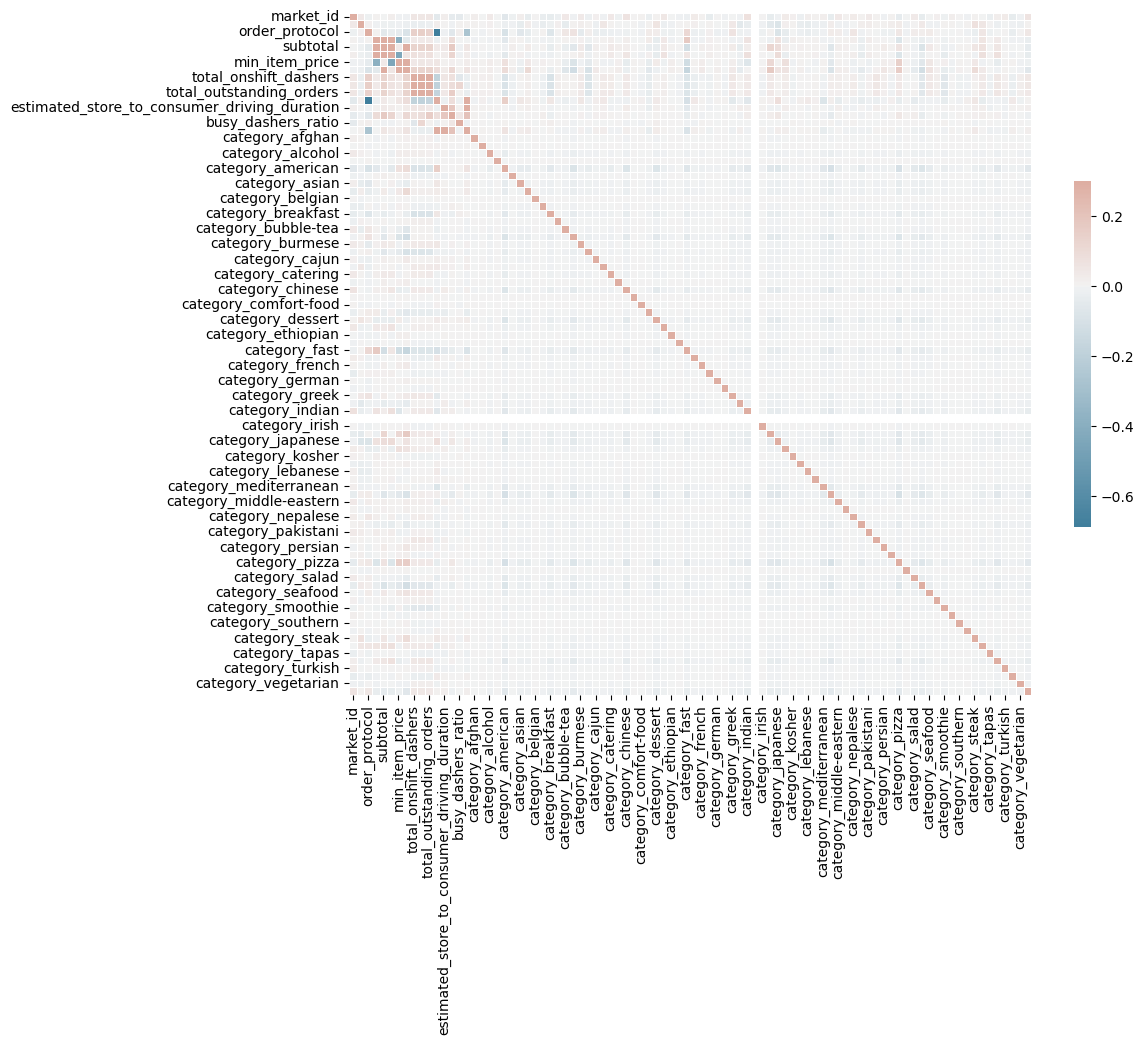

In [30]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,cmap = cmap, vmax = .3, center=0, square = True, linewidths=.5, cbar_kws={'shrink': .5})

In [31]:
train_df['category_indonesian'].describe()

count    175709.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

In [32]:
train_df = train_df.drop(columns=['category_indonesian'])

In [33]:
def get_redundant_pairs(df):
    """Get diagonal and lower triangular pairs of correlation matrix"""
    pairs_to_drop = set()
    cols =df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop        

In [34]:
def get_top_abs_correlations(df, n=5):
    """Sort correlations in the descending order and return n highest results"""
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
    

In [35]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df,20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers                0.941753
                                              total_outstanding_orders          0.934667
total_busy_dashers                            total_outstanding_orders          0.931322
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration       0.923067
total_items                                   num_distinct_items                0.757672
order_protocol                                estimated_order_place_duration    0.687093
subtotal                                      num_distinct_items                0.682923
total_items                                   subtotal                          0.556708
min_item_price                                max_item_price                    0.541571
subtotal                                      max_item_price                    0.507907
num_distinct_items                            min_item_price                    0.44

In [36]:
#drop highly correlated features
train_df = train_df.drop(columns=['total_onshift_dashers','total_busy_dashers','estimated_non_prep_duration'])

In [37]:
#align dtype over dataset
#train_df = train_df.astype("float32")

In [38]:
train_df.shape

(175709, 86)

In [39]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df,20))

Top Absolute Correlations
total_items                                   num_distinct_items                0.757672
order_protocol                                estimated_order_place_duration    0.687093
subtotal                                      num_distinct_items                0.682923
total_items                                   subtotal                          0.556708
min_item_price                                max_item_price                    0.541571
subtotal                                      max_item_price                    0.507907
num_distinct_items                            min_item_price                    0.446567
total_items                                   min_item_price                    0.388891
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188012
subtotal                                      actual_total_delivery_duration    0.172133
total_items                                   category_fast                     0.17

In [40]:
# order protocol dummies are corelating too much, remove it during concat and reiterate

In [41]:
train_df.shape


(175709, 86)

# Multicollinearity and feature selection

In [42]:
"""
#from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(features):
         #Compute VIF score using variance_inflation_factor() function
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(train_df[features].values,i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

#apply VIF computation to all columns
features = train_df.columns.to_list()
vif_data = compute_vif(features)
vif_data



multicollinearity = True
while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print('I will remove', highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF >25 ]) == 0 else True
selected_features = vif_data['feature'].values.tolist()
vif_data
"""

"\n#from statsmodels.stats.outliers_influence import variance_inflation_factor\ndef compute_vif(features):\n         #Compute VIF score using variance_inflation_factor() function\n    vif_data = pd.DataFrame()\n    vif_data['feature'] = features\n    vif_data['VIF'] = [variance_inflation_factor(train_df[features].values,i) for i in range(len(features))]\n    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)\n\n#apply VIF computation to all columns\nfeatures = train_df.columns.to_list()\nvif_data = compute_vif(features)\nvif_data\n\n\n\nmulticollinearity = True\nwhile multicollinearity:\n    highest_vif_feature = vif_data['feature'].values.tolist()[-1]\n    print('I will remove', highest_vif_feature)\n    features.remove(highest_vif_feature)\n    vif_data = compute_vif(features)\n    multicollinearity = False if len(vif_data[vif_data.VIF >25 ]) == 0 else True\nselected_features = vif_data['feature'].values.tolist()\nvif_data\n"

In [43]:
train_df.head()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,1.0,1845,1.0,4,3441,4,557,1239,21.0,446,...,0,0,0,0,0,0,0,0,0,0
1,2.0,5477,2.0,1,1900,1,1400,1400,2.0,446,...,0,0,0,0,0,0,0,0,0,0
2,3.0,5477,1.0,1,1900,1,1900,1900,0.0,446,...,0,0,0,0,0,0,0,0,0,0
3,3.0,5477,1.0,6,6900,5,600,1800,2.0,446,...,0,0,0,0,0,0,0,0,0,0
4,3.0,5477,1.0,3,3900,3,1100,1600,9.0,446,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#feature selection using GINI importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


y = train_df['actual_total_delivery_duration']
X = train_df.drop(columns =['actual_total_delivery_duration'])
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [48]:
y.head()

0   0 days 01:02:59
1   0 days 01:07:04
2   0 days 00:29:41
3   0 days 00:51:15
4   0 days 00:39:50
Name: actual_total_delivery_duration, dtype: timedelta64[ns]

In [49]:
train_df.shape

(175709, 86)

In [ ]:
feature_names = [f"]